# Penguins Clustering

#### Task:

- Tidying data & Normalization

- Reducing dimensionality with PCA

- Clustering with KMeans (4 clusters)

- Visualizing clusters

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('../../Data/main/penguins 2.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## Tidying Up

**(CODE TAKEN FROM CLASS NOTEBOOK)**

In [4]:
# dropping NaN rows
cleandata = data.dropna()

# removing 'bad' data from the sex column
cleandata.sex.value_counts()
cleandata = cleandata[cleandata.sex !='.']

# we'll format the sex column to display Male/Female as 1/0
cleandata['sex'] = np.uint8(cleandata.sex=='MALE')

In [5]:
cleandata.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


## Normlization

We use `StandardScaler` to normalize the data (set their mean to 0 and standard deviation to 1).

**Note:** This is usually only applicable to numerical data, so we should exclude the categorical data like `sex`. But since you are specifically made `sex` a numerical column, we can just normalize all columns. I'll check the data types first though to make sure.

In [8]:
cleandata.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    uint8
dtype: object

Since all the columns are numerical, we can normalize all of them.

In [7]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cleandata)

## PCA

In [13]:
pca = PCA(2)
penguins_pca = pca.fit_transform(normalized_data)

In [15]:
penguins_pca.shape

(334, 2)

## KMeans Clustering

In [27]:
kmeans = KMeans(4)
clusters = kmeans.fit_predict(penguins_pca)

## Visualization

I'll create a data frame so I can visualize the data.

In [32]:
df_pca = pd.DataFrame(penguins_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

df_pca.head()

,PC1,PC2,Cluster
0,-0.771000,1.205991,2
1,-1.228385,-0.587489,1
2,-1.679221,-0.298144,1
3,-2.103150,0.135911,1
4,-1.119886,1.923376,2


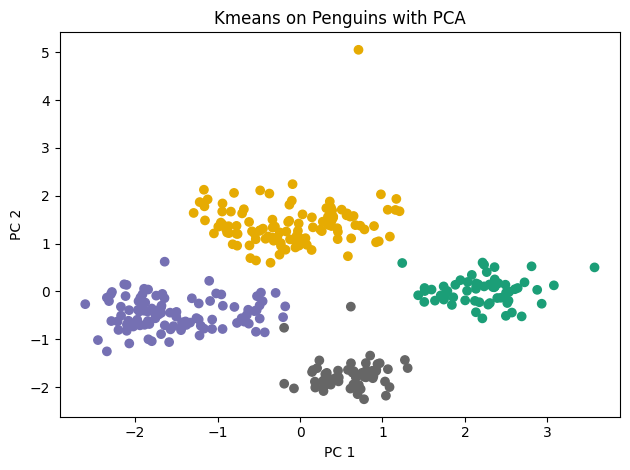

In [49]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='Dark2')

plt.title('Kmeans on Penguins with PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()
plt.show()